In [2]:
import xml.etree.ElementTree as ET
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
tree = ET.parse('./dataset/Marmot_data/10.1.1.1.2051_6.xml')
root = tree.getroot()
size = root.find('size')

In [4]:
width = int(size.find('width').text)
height = int(size.find('height').text)
col_mask = np.zeros((height, width), dtype=np.int32)
table_mask = np.zeros((height, width), dtype = np.int32)

In [5]:
col_mask.shape

(1008, 768)

In [6]:
def sameTable(ymin_1, ymin_2, ymax_1, ymax_2):
    min_diff = abs(ymin_1 - ymin_2)
    max_diff = abs(ymax_1 - ymax_2)
    if min_diff <= 5 and max_diff <=5:
        return True
    elif min_diff <= 4 and max_diff <=7:
        return True
    elif min_diff <= 7 and max_diff <=4:
        return True
    return False

In [7]:
got_first_column = False
i=0
first_xmin =0
prev_xmax = 0

prev_ymin = 0
prev_ymax = 0

for column in root.findall('object'):
    bndbox = column.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    if got_first_column:
        if sameTable(prev_ymin, ymin, prev_ymax, ymax) == False:
            i+=1
            got_first_column = False
            print("**********")
            print(first_xmin, prev_xmax)
            print(prev_ymin, prev_ymax)
            print("**********")
            table_mask[prev_ymin:prev_ymax, first_xmin:prev_xmax] = 255
            
    if got_first_column == False:
        got_first_column = True
        first_xmin = xmin
            
    print(xmin, xmax)
    print(ymin, ymax)
    print(i)
    print('==========')
    prev_xmax = xmax
    prev_ymin = ymin
    prev_ymax = ymax
    col_mask[ymin:ymax, xmin:xmax] = 255


104 114
160 286
0
132 157
156 292
0
177 209
160 292
0
228 262
159 289
0
281 315
160 289
0
**********
104 315
160 289
**********
469 496
160 265
1
510 523
160 265
1
540 568
160 265
1
584 609
158 264
1
625 659
159 264
1
**********
469 659
159 264
**********
115 142
424 531
2
157 168
427 531
2
186 215
425 531
2
232 257
427 530
2
269 306
426 531
2


In [8]:
print("**********")
print(first_xmin, prev_xmax)
print(prev_ymin, prev_ymax)
print("**********")
table_mask[prev_ymin:prev_ymax, first_xmin:prev_xmax] = 255

**********
115 306
426 531
**********


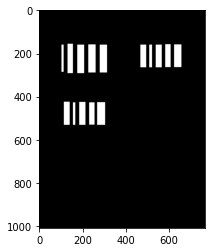

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(col_mask.astype(np.uint8), cmap='gray')

In [16]:
im = Image.fromarray(col_mask.astype(np.uint8),'L')
# im.show()
im.save("column_mask.jpeg")

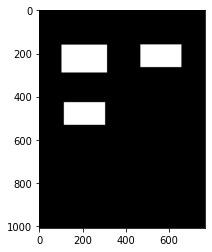

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.savefig('table_mask.png', dpi=310)
ax.imshow(table_mask.astype(np.uint8), cmap='gray')

In [18]:
im = Image.fromarray(table_mask.astype(np.uint8),'L')
# im.show()
im.save("table_mask.jpeg")